In [4]:
import warnings
warnings.filterwarnings("ignore")
import splitfolders
import seaborn as sns
import pandas as pd
import numpy as np
import os
print('CWD is ',os.getcwd())
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Flatten, Conv2D, Dense, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
import tensorflow

CWD is  C:\Users\Yam\Desktop\real


In [5]:
dataset_folder = "./fundus_dataset"
output = "./preprocess_data"
splitfolders.ratio(dataset_folder, output, seed=3, ratio=(.6, .2, .2))

Copying files: 343 files [00:12, 27.97 files/s]


In [6]:
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None)



In [7]:
height, width = (224,224)
batch_size = 4
train_data_dir = r"./preprocess_data/train"
valid_data_dir = r"./preprocess_data/val"
test_data_dir = r"./preprocess_data/test"

In [8]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, 
                                 shear_range=0.1, zoom_range=0.1, 
                                 validation_split=0.2,horizontal_flip=True)
    
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  subset='training')

Found 166 images belonging to 4 classes.


In [9]:
valid_generator=train_datagen.flow_from_directory(valid_data_dir,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  subset='training')

Found 56 images belonging to 4 classes.


In [10]:
test_generator=train_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(height, width),
                                                  batch_size=1,
                                                  class_mode="categorical",
                                                  subset='training')

Found 59 images belonging to 4 classes.


In [11]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [12]:
base_model = VGG16(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predicions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input,outputs=predicions)

In [13]:
for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(train_generator,epochs=30)

Train for 42 steps
Epoch 1/30
42/42 [==============================] - ETA: 6:23 - loss: 1.7991 - accuracy: 0.0000e+ - ETA: 3:31 - loss: 3.5573 - accuracy: 0.2500   - ETA: 2:31 - loss: 4.7658 - accuracy: 0.25 - ETA: 2:02 - loss: 3.8289 - accuracy: 0.37 - ETA: 1:43 - loss: 3.9022 - accuracy: 0.45 - ETA: 1:30 - loss: 3.4056 - accuracy: 0.50 - ETA: 1:21 - loss: 5.0697 - accuracy: 0.42 - ETA: 1:14 - loss: 4.8811 - accuracy: 0.43 - ETA: 1:08 - loss: 4.6254 - accuracy: 0.44 - ETA: 1:03 - loss: 4.1748 - accuracy: 0.50 - ETA: 58s - loss: 4.0822 - accuracy: 0.5000 - ETA: 54s - loss: 3.8548 - accuracy: 0.520 - ETA: 51s - loss: 3.6400 - accuracy: 0.538 - ETA: 48s - loss: 3.4869 - accuracy: 0.553 - ETA: 45s - loss: 3.4316 - accuracy: 0.566 - ETA: 42s - loss: 3.2473 - accuracy: 0.578 - ETA: 40s - loss: 3.0570 - accuracy: 0.602 - ETA: 38s - loss: 2.9409 - accuracy: 0.583 - ETA: 36s - loss: 2.8001 - accuracy: 0.592 - ETA: 34s - loss: 2.6619 - accuracy: 0.612 - ETA: 32s - loss: 2.5530 - accuracy: 0.61

42/42 [==============================] - ETA: 3:51 - loss: 6.8894e-05 - accuracy: 1.00 - ETA: 2:14 - loss: 1.9342e-04 - accuracy: 1.00 - ETA: 1:41 - loss: 9.4535e-04 - accuracy: 1.00 - ETA: 1:24 - loss: 7.0927e-04 - accuracy: 1.00 - ETA: 1:13 - loss: 0.0058 - accuracy: 1.0000   - ETA: 1:06 - loss: 0.0331 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0285 - accuracy: 1.00 - ETA: 56s - loss: 0.0252 - accuracy: 1.0000 - ETA: 53s - loss: 0.0885 - accuracy: 0.944 - ETA: 50s - loss: 0.1625 - accuracy: 0.925 - ETA: 47s - loss: 0.1606 - accuracy: 0.931 - ETA: 45s - loss: 0.1473 - accuracy: 0.937 - ETA: 42s - loss: 0.2269 - accuracy: 0.923 - ETA: 40s - loss: 0.2143 - accuracy: 0.928 - ETA: 38s - loss: 0.2019 - accuracy: 0.933 - ETA: 36s - loss: 0.1901 - accuracy: 0.937 - ETA: 34s - loss: 0.1790 - accuracy: 0.941 - ETA: 32s - loss: 0.1746 - accuracy: 0.944 - ETA: 31s - loss: 0.2399 - accuracy: 0.934 - ETA: 29s - loss: 0.3053 - accuracy: 0.925 - ETA: 27s - loss: 0.2998 - accuracy: 0.928 - ETA: 26s - los

42/42 [==============================] - ETA: 4:06 - loss: 6.2585e-07 - accuracy: 1.00 - ETA: 2:23 - loss: 2.8759e-06 - accuracy: 1.00 - ETA: 1:48 - loss: 5.5580e-04 - accuracy: 1.00 - ETA: 1:30 - loss: 4.1686e-04 - accuracy: 1.00 - ETA: 1:18 - loss: 5.2199e-04 - accuracy: 1.00 - ETA: 1:11 - loss: 4.3501e-04 - accuracy: 1.00 - ETA: 1:05 - loss: 3.7763e-04 - accuracy: 1.00 - ETA: 1:00 - loss: 3.3052e-04 - accuracy: 1.00 - ETA: 56s - loss: 3.0580e-04 - accuracy: 1.0000 - ETA: 54s - loss: 2.7528e-04 - accuracy: 1.000 - ETA: 50s - loss: 0.0029 - accuracy: 1.0000    - ETA: 48s - loss: 0.0027 - accuracy: 1.000 - ETA: 45s - loss: 0.1050 - accuracy: 0.980 - ETA: 43s - loss: 0.1546 - accuracy: 0.946 - ETA: 41s - loss: 0.1443 - accuracy: 0.950 - ETA: 39s - loss: 0.1360 - accuracy: 0.953 - ETA: 37s - loss: 0.1280 - accuracy: 0.955 - ETA: 35s - loss: 0.2275 - accuracy: 0.944 - ETA: 33s - loss: 0.2156 - accuracy: 0.947 - ETA: 31s - loss: 0.2051 - accuracy: 0.950 - ETA: 29s - loss: 0.1953 - accuracy

42/42 [==============================] - ETA: 4:02 - loss: 1.0043e-05 - accuracy: 1.00 - ETA: 2:32 - loss: 4.0435e-04 - accuracy: 1.00 - ETA: 1:57 - loss: 2.8140e-04 - accuracy: 1.00 - ETA: 1:37 - loss: 2.8502e-04 - accuracy: 1.00 - ETA: 1:25 - loss: 4.6785e-04 - accuracy: 1.00 - ETA: 1:16 - loss: 0.1659 - accuracy: 0.9583   - ETA: 1:09 - loss: 0.1422 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1244 - accuracy: 0.96 - ETA: 59s - loss: 0.1106 - accuracy: 0.9722 - ETA: 55s - loss: 0.0995 - accuracy: 0.975 - ETA: 52s - loss: 0.0905 - accuracy: 0.977 - ETA: 50s - loss: 0.0843 - accuracy: 0.979 - ETA: 47s - loss: 0.0779 - accuracy: 0.980 - ETA: 45s - loss: 0.0723 - accuracy: 0.982 - ETA: 43s - loss: 0.0675 - accuracy: 0.983 - ETA: 42s - loss: 0.0633 - accuracy: 0.984 - ETA: 40s - loss: 0.0596 - accuracy: 0.985 - ETA: 38s - loss: 0.0563 - accuracy: 0.986 - ETA: 36s - loss: 0.0533 - accuracy: 0.986 - ETA: 35s - loss: 0.0509 - accuracy: 0.987 - ETA: 33s - loss: 0.0487 - accuracy: 0.988 - ETA: 31s -

42/42 [==============================] - ETA: 3:15 - loss: 1.7792e-05 - accuracy: 1.00 - ETA: 1:57 - loss: 5.7754e-04 - accuracy: 1.00 - ETA: 1:30 - loss: 4.0526e-04 - accuracy: 1.00 - ETA: 1:17 - loss: 6.8356e-04 - accuracy: 1.00 - ETA: 1:08 - loss: 5.5006e-04 - accuracy: 1.00 - ETA: 1:03 - loss: 4.5846e-04 - accuracy: 1.00 - ETA: 58s - loss: 3.9400e-04 - accuracy: 1.0000 - ETA: 54s - loss: 3.4512e-04 - accuracy: 1.000 - ETA: 50s - loss: 3.0744e-04 - accuracy: 1.000 - ETA: 48s - loss: 3.2935e-04 - accuracy: 1.000 - ETA: 45s - loss: 5.0968e-04 - accuracy: 1.000 - ETA: 43s - loss: 4.6772e-04 - accuracy: 1.000 - ETA: 41s - loss: 4.3195e-04 - accuracy: 1.000 - ETA: 39s - loss: 4.0174e-04 - accuracy: 1.000 - ETA: 38s - loss: 3.7514e-04 - accuracy: 1.000 - ETA: 36s - loss: 3.5248e-04 - accuracy: 1.000 - ETA: 34s - loss: 3.3175e-04 - accuracy: 1.000 - ETA: 33s - loss: 3.1351e-04 - accuracy: 1.000 - ETA: 31s - loss: 2.9703e-04 - accuracy: 1.000 - ETA: 29s - loss: 2.8303e-04 - accuracy: 1.000 

Epoch 21/30
42/42 [==============================] - ETA: 2:27 - loss: 1.0670e-04 - accuracy: 1.00 - ETA: 1:35 - loss: 5.4229e-05 - accuracy: 1.00 - ETA: 1:16 - loss: 7.4986e-05 - accuracy: 1.00 - ETA: 1:06 - loss: 5.6336e-05 - accuracy: 1.00 - ETA: 59s - loss: 4.5474e-05 - accuracy: 1.0000 - ETA: 54s - loss: 4.8251e-05 - accuracy: 1.000 - ETA: 51s - loss: 4.1371e-05 - accuracy: 1.000 - ETA: 47s - loss: 3.9906e-05 - accuracy: 1.000 - ETA: 45s - loss: 4.6248e-05 - accuracy: 1.000 - ETA: 42s - loss: 4.1713e-05 - accuracy: 1.000 - ETA: 40s - loss: 1.4268e-04 - accuracy: 1.000 - ETA: 38s - loss: 1.3911e-04 - accuracy: 1.000 - ETA: 35s - loss: 1.2841e-04 - accuracy: 1.000 - ETA: 33s - loss: 1.1926e-04 - accuracy: 1.000 - ETA: 32s - loss: 1.1158e-04 - accuracy: 1.000 - ETA: 30s - loss: 1.0461e-04 - accuracy: 1.000 - ETA: 29s - loss: 9.8552e-05 - accuracy: 1.000 - ETA: 28s - loss: 9.6744e-05 - accuracy: 1.000 - ETA: 27s - loss: 9.1658e-05 - accuracy: 1.000 - ETA: 25s - loss: 8.7080e-05 - accu

Epoch 25/30
42/42 [==============================] - ETA: 2:25 - loss: 3.5373e-05 - accuracy: 1.00 - ETA: 1:31 - loss: 1.7687e-05 - accuracy: 1.00 - ETA: 1:12 - loss: 1.2099e-05 - accuracy: 1.00 - ETA: 1:02 - loss: 1.5467e-05 - accuracy: 1.00 - ETA: 56s - loss: 8.3933e-05 - accuracy: 1.0000 - ETA: 52s - loss: 6.9949e-05 - accuracy: 1.000 - ETA: 49s - loss: 5.9973e-05 - accuracy: 1.000 - ETA: 46s - loss: 5.2760e-05 - accuracy: 1.000 - ETA: 44s - loss: 4.6898e-05 - accuracy: 1.000 - ETA: 42s - loss: 4.5295e-05 - accuracy: 1.000 - ETA: 40s - loss: 4.1229e-05 - accuracy: 1.000 - ETA: 38s - loss: 5.0723e-05 - accuracy: 1.000 - ETA: 36s - loss: 4.6888e-05 - accuracy: 1.000 - ETA: 34s - loss: 4.9084e-05 - accuracy: 1.000 - ETA: 33s - loss: 4.5883e-05 - accuracy: 1.000 - ETA: 31s - loss: 4.5239e-05 - accuracy: 1.000 - ETA: 30s - loss: 4.2599e-05 - accuracy: 1.000 - ETA: 28s - loss: 4.1154e-05 - accuracy: 1.000 - ETA: 27s - loss: 3.8990e-05 - accuracy: 1.000 - ETA: 25s - loss: 3.7161e-05 - accu

42/42 [==============================] - ETA: 2:42 - loss: 7.8081e-06 - accuracy: 1.00 - ETA: 1:41 - loss: 3.9487e-06 - accuracy: 1.00 - ETA: 1:19 - loss: 2.3899e-05 - accuracy: 1.00 - ETA: 1:08 - loss: 6.0483e-05 - accuracy: 1.00 - ETA: 1:00 - loss: 4.8422e-05 - accuracy: 1.00 - ETA: 55s - loss: 4.4509e-05 - accuracy: 1.0000 - ETA: 52s - loss: 3.8219e-05 - accuracy: 1.000 - ETA: 49s - loss: 3.4119e-05 - accuracy: 1.000 - ETA: 46s - loss: 6.2421e-05 - accuracy: 1.000 - ETA: 44s - loss: 6.2884e-05 - accuracy: 1.000 - ETA: 42s - loss: 5.7262e-05 - accuracy: 1.000 - ETA: 38s - loss: 5.2823e-05 - accuracy: 1.000 - ETA: 37s - loss: 4.9702e-05 - accuracy: 1.000 - ETA: 35s - loss: 4.6190e-05 - accuracy: 1.000 - ETA: 34s - loss: 4.3120e-05 - accuracy: 1.000 - ETA: 32s - loss: 4.0591e-05 - accuracy: 1.000 - ETA: 31s - loss: 3.8268e-05 - accuracy: 1.000 - ETA: 29s - loss: 3.6819e-05 - accuracy: 1.000 - ETA: 28s - loss: 3.6329e-05 - accuracy: 1.000 - ETA: 26s - loss: 3.4650e-05 - accuracy: 1.000 

In [15]:
model.save("./Saved_Model/VGG16.h5")

In [16]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy: ', test_acc)

59/59 - 18s - loss: 0.0014 - accuracy: 1.0000

Test accuracy:  1.0


In [17]:
model = tensorflow.keras.models.load_model("./Saved_Model/VGG16.h5")
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

In [18]:
out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['predicted_class'],out_df['actual_class'], rownames=['Actual'],colnames=['Predicted'])

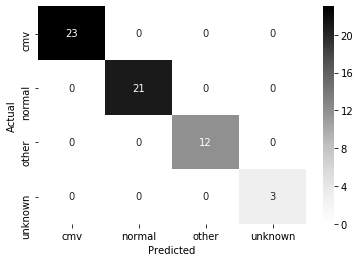

Test accuracy: 100.0


In [62]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Greys")
plt.show()
print('Test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [20]:
from matplotlib.pyplot import imread
from tensorflow.keras.preprocessing.image import img_to_array, load_img

Input image unseen shape: (1, 224, 224, 3)
Unseen image predicted class: [0]


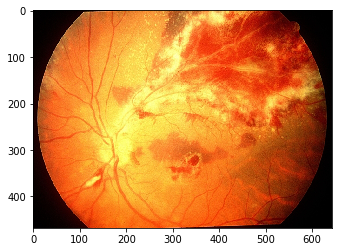

In [21]:
img_unseen_path = 'test.jpg'
img_test = image.load_img(img_unseen_path, target_size=(224,224))
x = image.img_to_array(img_test)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image unseen shape:', x.shape)
project_img = imread(img_unseen_path)
plt.imshow(project_img)
#print(model.predict(x))
predict=model.predict(x)
predict=np.argmax(predict,axis=1)
print('Unseen image predicted class:', predict)

Input image unseen shape: (1, 224, 224, 3)
Unseen image predicted class: [2]


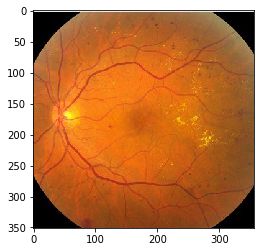

In [66]:
img_unseen_path = 'diabetic.jpg'
img_test = image.load_img(img_unseen_path, target_size=(224,224))
x = image.img_to_array(img_test)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image unseen shape:', x.shape)
project_img = imread(img_unseen_path)
plt.imshow(project_img)
#print(model.predict(x))
predict=model.predict(x)
predict=np.argmax(predict,axis=1)
print('Unseen image predicted class:', predict)

Input image unseen shape: (1, 224, 224, 3)
Unseen image predicted class: [2]


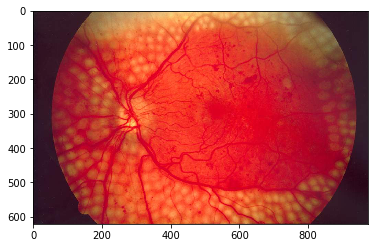

In [67]:
img_unseen_path = 'diabetic_1.jpg'
img_test = image.load_img(img_unseen_path, target_size=(224,224))
x = image.img_to_array(img_test)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image unseen shape:', x.shape)
project_img = imread(img_unseen_path)
plt.imshow(project_img)
#print(model.predict(x))
predict=model.predict(x)
predict=np.argmax(predict,axis=1)
print('Unseen image predicted class:', predict)

Input image unseen shape: (1, 224, 224, 3)
Unseen image predicted class: [1]


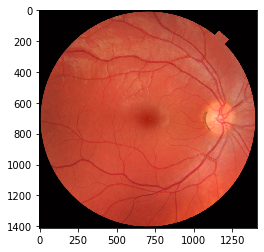

In [23]:
img_unseen_path = 'test1.jpg'
img_test = image.load_img(img_unseen_path, target_size=(224,224))
x = image.img_to_array(img_test)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image unseen shape:', x.shape)
project_img = imread(img_unseen_path)
plt.imshow(project_img)
#print(model.predict(x))
predict=model.predict(x)
predict=np.argmax(predict,axis=1)
print('Unseen image predicted class:', predict)

Input image unseen shape: (1, 224, 224, 3)
Unseen image predicted class: [3]


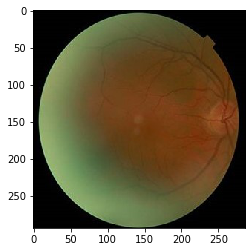

In [69]:
img_unseen_path = 'unk.jpg'
img_test = image.load_img(img_unseen_path, target_size=(224,224))
x = image.img_to_array(img_test)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image unseen shape:', x.shape)
project_img = imread(img_unseen_path)
plt.imshow(project_img)
#print(model.predict(x))
predict=model.predict(x)
predict=np.argmax(predict,axis=1)
print('Unseen image predicted class:', predict)

Input image unseen shape: (1, 224, 224, 3)
Unseen image predicted class: [3]


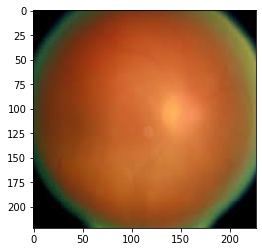

In [71]:
img_unseen_path = 'blur.jpg'
img_test = image.load_img(img_unseen_path, target_size=(224,224))
x = image.img_to_array(img_test)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image unseen shape:', x.shape)
project_img = imread(img_unseen_path)
plt.imshow(project_img)
#print(model.predict(x))
predict=model.predict(x)
predict=np.argmax(predict,axis=1)
print('Unseen image predicted class:', predict)

In [24]:
out_df.head()

,predicted_class,actual_class
0,other,other
1,normal,normal
2,cmv,cmv
3,normal,normal
4,normal,normal


In [25]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
out_df['actual_class']= label_encoder.fit_transform(out_df['actual_class'])
out_df['predicted_class']= label_encoder.fit_transform(out_df['predicted_class'])

out_df.head()

,predicted_class,actual_class
0,2,2
1,1,1
2,0,0
3,1,1
4,1,1


- class 0 = CMV retinitis
- class 1 = normal
- class 2 = other retinitis
- class 3 = unknown or can't diagnosis

In [26]:
inverted = label_encoder.inverse_transform(out_df['actual_class'])
inverted

array(['other', 'normal', 'cmv', 'normal', 'normal', 'normal', 'normal',
       'cmv', 'normal', 'other', 'other', 'normal', 'cmv', 'normal',
       'cmv', 'other', 'cmv', 'cmv', 'normal', 'unknown', 'cmv', 'cmv',
       'cmv', 'normal', 'other', 'cmv', 'normal', 'normal', 'other',
       'cmv', 'normal', 'other', 'other', 'cmv', 'cmv', 'cmv', 'unknown',
       'normal', 'normal', 'unknown', 'normal', 'cmv', 'normal', 'other',
       'normal', 'cmv', 'normal', 'cmv', 'normal', 'cmv', 'cmv', 'other',
       'cmv', 'other', 'normal', 'cmv', 'cmv', 'other', 'cmv'],
      dtype=object)

In [27]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(out_df['predicted_class'], out_df['actual_class'].astype('int'), 
                                                          weights='quadratic'))
print("Train Accuracy score : %.3f" % accuracy_score( out_df['actual_class'].astype('int'),out_df['predicted_class']))

Train Cohen Kappa score: 1.000
Train Accuracy score : 1.000


acc,kappa
1.000, 1.000
0.982, 0.960
1.000, 1.000

In [64]:
tensorflow.version.VERSION

'2.0.0'